# The Sparks Foundation:Task 4-Global Terrorism-Exploratory Data Analysis

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tl
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
data=pd.read_csv("globalterrorismdb_0718dist.csv")
pd.set_option('display.max_columns',None)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

## Cleaning or pre-processing data

In [3]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [4]:
data=data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [5]:
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,State,City,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attack_type,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,Target_subtype,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Gang_name,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,

In [6]:
terror=data[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type','latitude','longitude','success']]

In [7]:
terror.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,latitude,longitude,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,18.456792,-69.951164,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,19.371887,-99.086624,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,15.478598,120.599741,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,37.997490,23.762728,1
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,33.580412,130.396361,1


In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   State           181270 non-null  object 
 6   City            181257 non-null  object 
 7   Attack_type     181691 non-null  object 
 8   Target_type     181691 non-null  object 
 9   Target_subtype  171318 non-null  object 
 10  Gang_name       181691 non-null  object 
 11  Weapon_type     181691 non-null  object 
 12  latitude        177135 non-null  float64
 13  longitude       177134 non-null  float64
 14  success         181691 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 20.8+ MB


In [9]:
terror.duplicated().sum()

15387

In [10]:
terror.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                434
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
latitude           4556
longitude          4557
success               0
dtype: int64

In [11]:
terror=terror.drop_duplicates()

In [12]:
terror=terror.dropna(axis=0)

In [13]:
terror=terror[terror["Month"]>0]

In [14]:
terror=terror[terror['Day']>0]

In [15]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151949 entries, 5 to 181689
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            151949 non-null  int64  
 1   Month           151949 non-null  int64  
 2   Day             151949 non-null  int64  
 3   Country         151949 non-null  object 
 4   Region          151949 non-null  object 
 5   State           151949 non-null  object 
 6   City            151949 non-null  object 
 7   Attack_type     151949 non-null  object 
 8   Target_type     151949 non-null  object 
 9   Target_subtype  151949 non-null  object 
 10  Gang_name       151949 non-null  object 
 11  Weapon_type     151949 non-null  object 
 12  latitude        151949 non-null  float64
 13  longitude       151949 non-null  float64
 14  success         151949 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 18.5+ MB


## Explorating Data Analysis

In [16]:
#Number of attacks in each year between 1971 to 2018
terror['Year'].value_counts()

2014    14742
2015    12858
2016    11371
2013    10727
2017     9395
2012     7680
2011     4509
2010     4310
2008     4276
2009     4199
1992     4103
1991     3563
1989     3558
1988     3040
1990     2952
2007     2808
1994     2768
1984     2528
1987     2302
1997     2291
1983     2283
2006     2272
1996     2180
1995     2170
1981     2154
1980     2127
1986     2098
1985     2048
1982     1994
1979     1976
2005     1834
2001     1750
2000     1585
1999     1246
1978     1217
2002     1195
2003     1155
2004     1059
1977     1055
1998      816
1976      756
1975      605
1970      573
1974      508
1972      469
1973      433
1971      411
Name: Year, dtype: int64

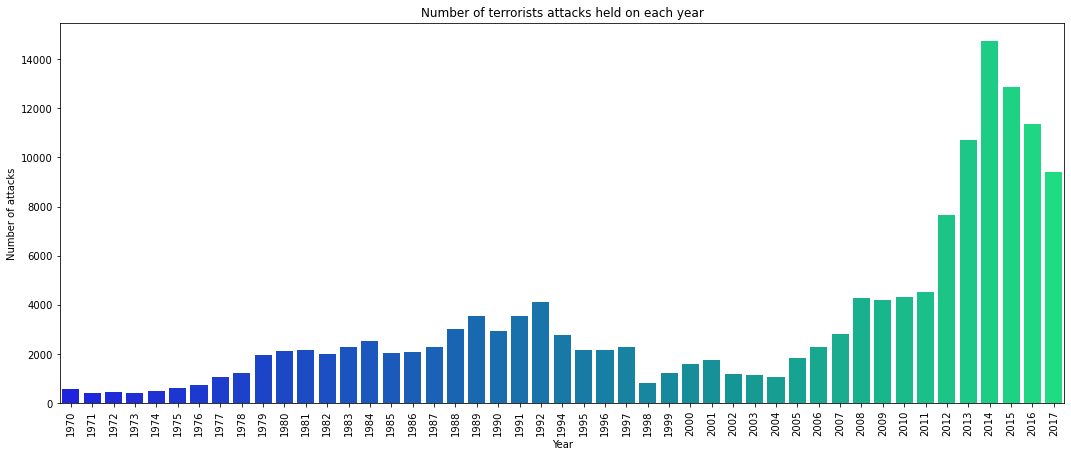

In [17]:
# Graphical representation 
plt.figure(figsize=(18,7))
sns.barplot(terror['Year'].value_counts().index,terror['Year'].value_counts().values,palette='winter')
plt.xticks(rotation=90)
plt.title('Number of terrorists attacks held on each year')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

In [18]:
#Number of attacks in each month of every particular year between 1971 to 2018
m={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:'November',12:'december'}
terror['Month']=terror['Month'].replace(m)
terror['Month'].value_counts()

May          13882
July         13575
August       13294
October      13065
April        12900
June         12859
March        12838
November     12532
January      12512
September    11724
February     11509
december     11259
Name: Month, dtype: int64

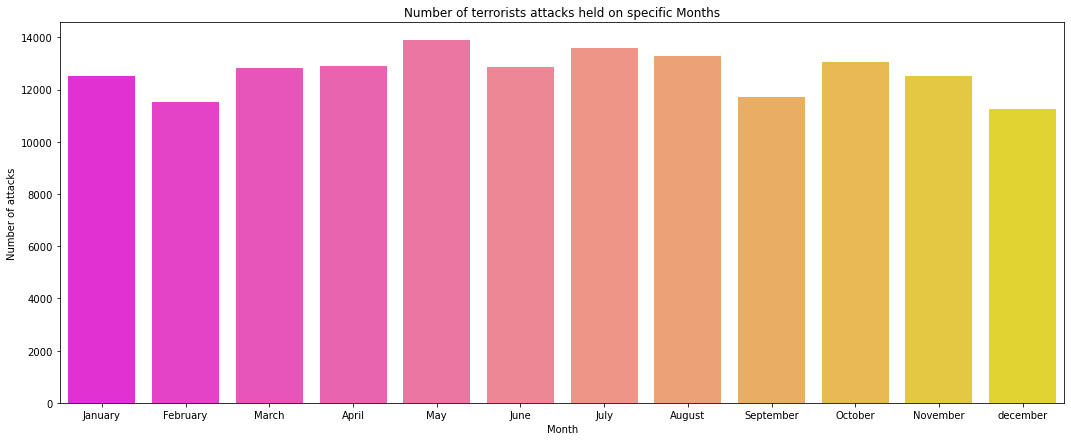

In [19]:
# Graphical representation
mn=("January","February","March","April","May","June","July","August","September","October",'November','december')
plt.figure(figsize=(18,7))
sns.barplot(terror['Month'].value_counts().index,terror['Month'].value_counts().values,order=mn,palette='spring')
plt.title('Number of terrorists attacks held on specific Months')
plt.xlabel('Month')
plt.ylabel('Number of attacks')
plt.show()

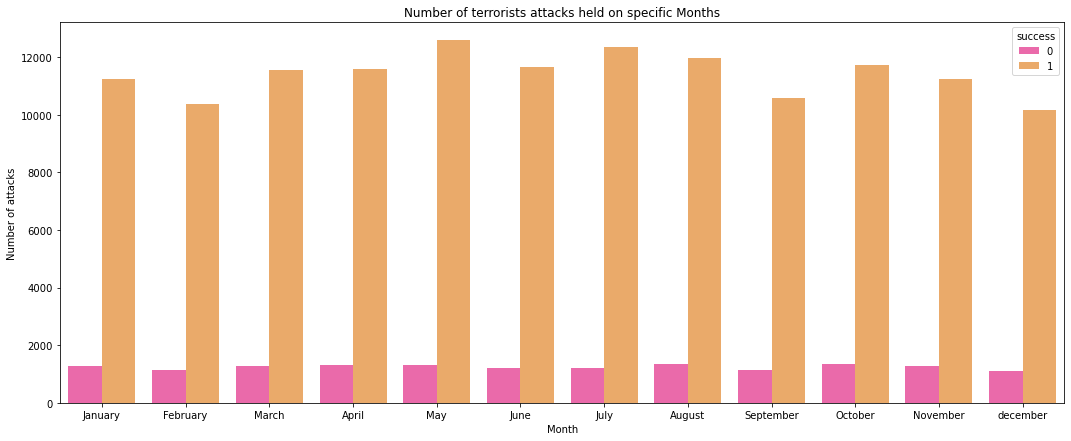

In [20]:
mn=("January","February","March","April","May","June","July","August","September","October",'November','december')
plt.figure(figsize=(18,7))
sns.countplot(terror['Month'],hue=terror['success'],order=mn,palette='spring')
plt.title('Number of terrorists attacks held on specific Months')
plt.xlabel('Month')
plt.ylabel('Number of attacks')
plt.show()

In [21]:
# Count of different attack types
terror['Attack_type'].value_counts()

Bombing/Explosion                      70064
Armed Assault                          38001
Assassination                          17344
Hostage Taking (Kidnapping)             9722
Facility/Infrastructure Attack          8296
Unknown                                 6241
Hostage Taking (Barricade Incident)      856
Unarmed Assault                          853
Hijacking                                572
Name: Attack_type, dtype: int64

In [22]:
#Graphical representation
a=terror['Attack_type'].value_counts().index

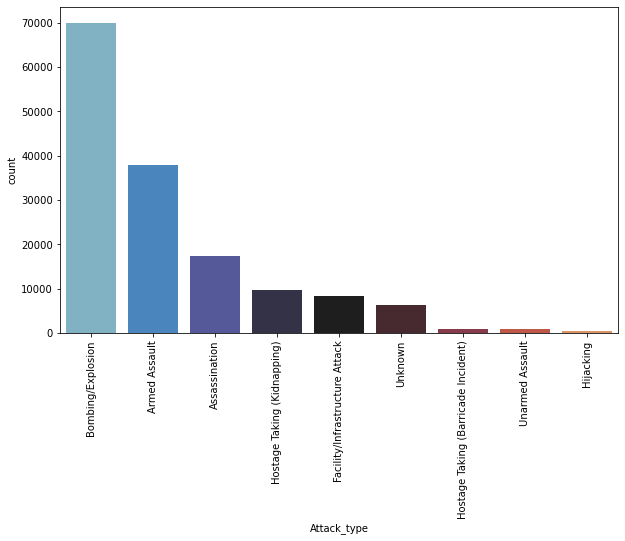

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(terror['Attack_type'],order=a,palette='icefire')
plt.xticks(rotation=90)
plt.show()

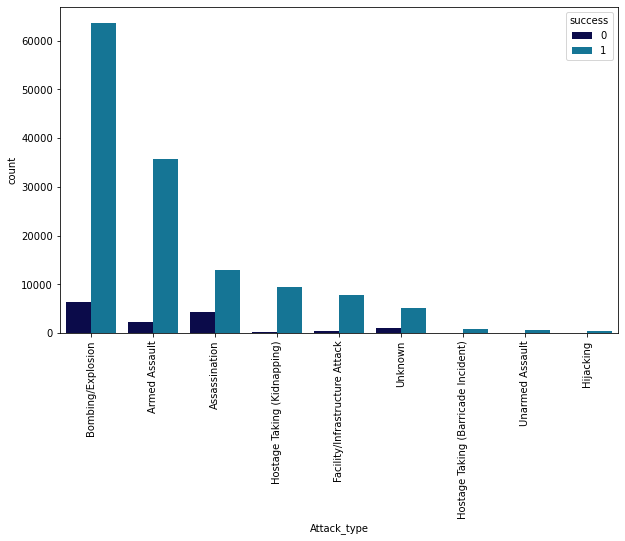

In [24]:
#Success rate in each type of attack
plt.figure(figsize=(10,6))
sns.countplot(terror['Attack_type'],hue=terror['success'],order=a,palette='ocean')
plt.xticks(rotation=90)
plt.show()

In [25]:
# mostly used weapons by the terrorists
terror['Weapon_type'].value_counts()

Explosives                                                                     74149
Firearms                                                                       52728
Unknown                                                                        12616
Incendiary                                                                      8517
Melee                                                                           3249
Chemical                                                                         270
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      131
Sabotage Equipment                                                               118
Other                                                                            102
Fake Weapons                                                                      31
Biological                                                                        31
Radiological                                                     

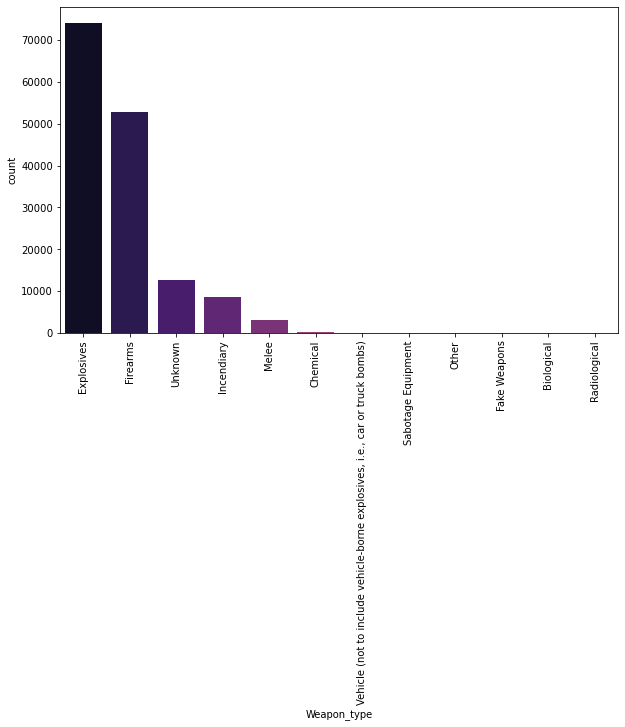

In [26]:
# Graphical represention 
plt.figure(figsize=(10,6))
sns.countplot(terror['Weapon_type'],order=terror['Weapon_type'].value_counts().index,palette='magma')
plt.xticks(rotation=90)
plt.show()

In [27]:
#Mostly damaged targets
terror['Target_type'].value_counts()

Private Citizens & Property       37707
Military                          25734
Police                            22684
Government (General)              19254
Business                          15165
Transportation                     5680
Religious Figures/Institutions     3872
Educational Institution            3850
Utilities                          3688
Government (Diplomatic)            3208
Terrorists/Non-State Militia       2797
Journalists & Media                2534
Violent Political Party            1725
Airports & Aircraft                1222
NGO                                 822
Telecommunication                   711
Tourists                            396
Maritime                            277
Food or Water Supply                274
Abortion Related                    236
Other                               113
Name: Target_type, dtype: int64

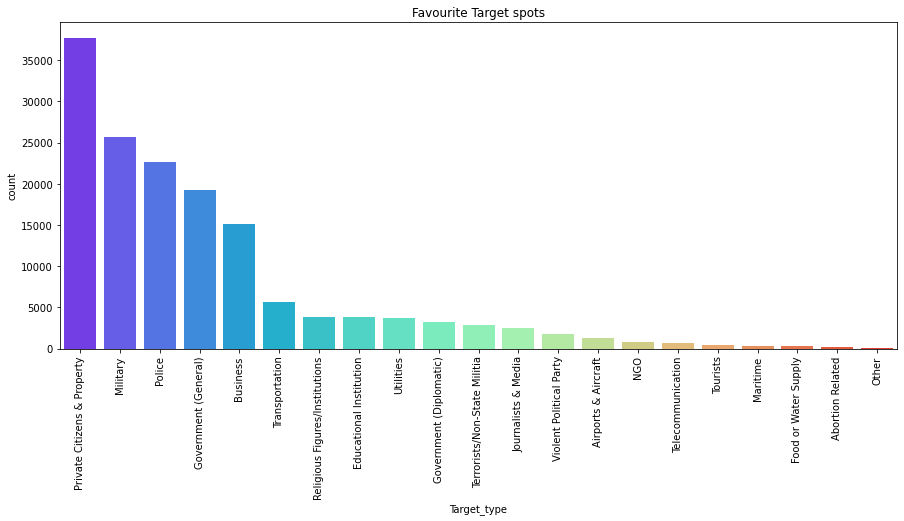

In [28]:
#Graphical represention 
plt.figure(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='rainbow',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favourite Target spots')
plt.show()

In [29]:
#Top 10 attacked sub_types
terror['Target_subtype'].value_counts()[:10]

Police Security Forces/Officers                            10391
Unnamed Civilian/Unspecified                               10113
Military Personnel (soldiers, troops, officers, forces)     7476
Military Unit/Patrol/Convoy                                 7413
Government Personnel (excluding police, military)           6248
Politician or Political Party Movement/Meeting/Rally        5707
Village/City/Town/Suburb                                    5530
Police Building (headquarters, station, school)             5369
Police Patrol (including vehicles and convoys)              4894
Military Barracks/Base/Headquarters/Checkpost               4851
Name: Target_subtype, dtype: int64

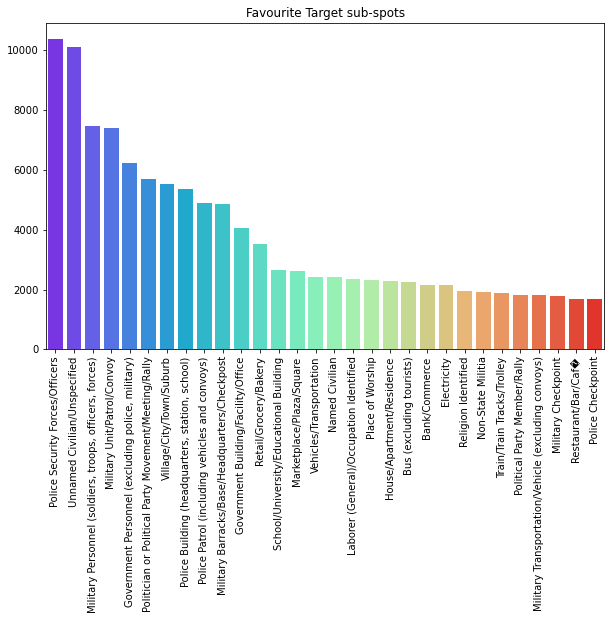

In [30]:
#Graphical representation
plt.figure(figsize=(10,6))
sns.barplot(terror['Target_subtype'].value_counts()[:30].index,terror['Target_subtype'].value_counts()[:30].values,palette='rainbow')
plt.xticks(rotation=90)
plt.title('Favourite Target sub-spots')
plt.show()

In [31]:
#Regions which have been mainly targeted
terror['Region'].value_counts()

Middle East & North Africa     42516
South Asia                     39106
Sub-Saharan Africa             15548
South America                  14400
Western Europe                 13487
Southeast Asia                 10423
Central America & Caribbean     7556
Eastern Europe                  4600
North America                   3011
East Asia                        590
Central Asia                     483
Australasia & Oceania            229
Name: Region, dtype: int64

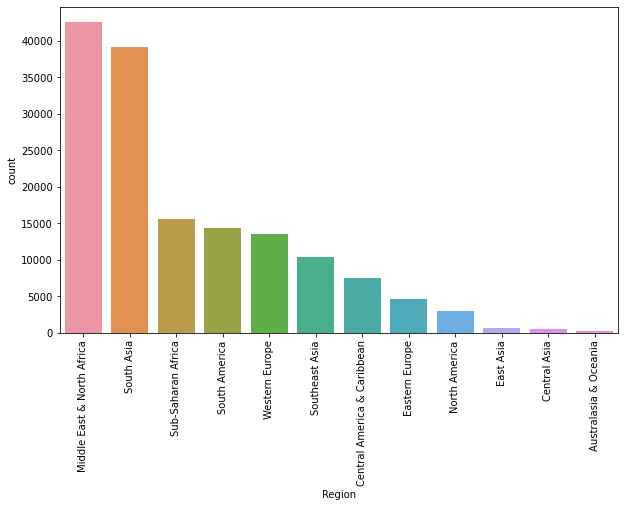

In [32]:
#graphical representation
plt.figure(figsize=(10,6))
sns.countplot(terror['Region'],order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

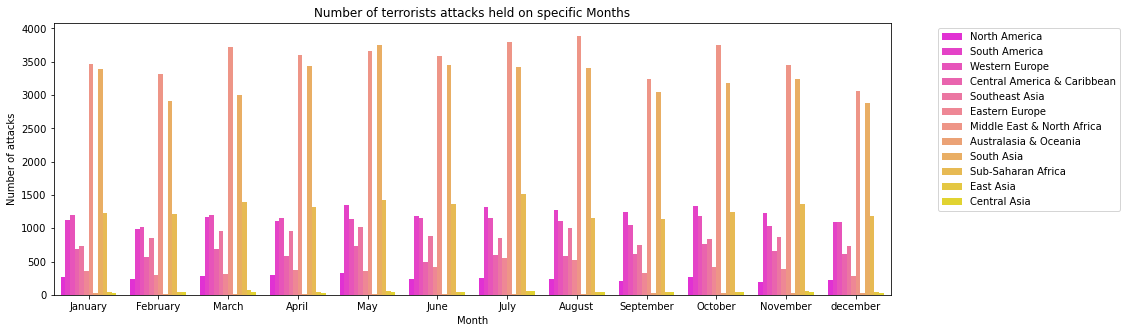

In [33]:
#Number of attacks on every region in each month
plt.figure(figsize=(15,5))
sns.countplot(terror['Month'],hue=terror['Region'],order=mn,palette='spring')
plt.title('Number of terrorists attacks held on specific Months')
plt.xlabel('Month')
plt.ylabel('Number of attacks')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [34]:
#Top 10 countries faced most attacks
terror['Country'].value_counts()[:10]

Iraq              20229
Pakistan          12425
Afghanistan       11239
India             10457
Colombia           6490
Philippines        5941
United Kingdom     4551
Peru               4348
Somalia            3866
El Salvador        3709
Name: Country, dtype: int64

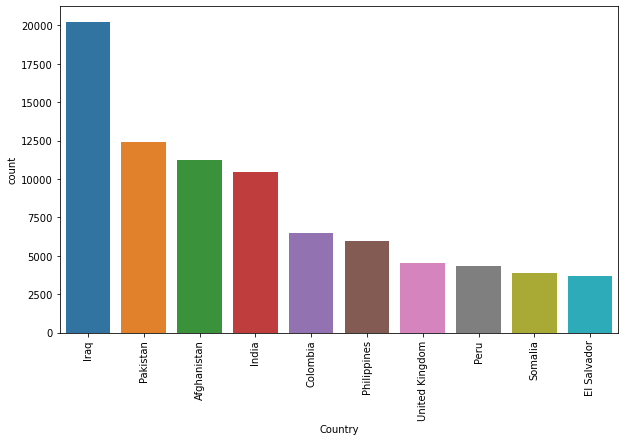

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(terror['Country'],order=terror['Country'].value_counts()[:10].index)
plt.xticks(rotation=90)
plt.show()

In [46]:
#Top 10 states faces most attacks
terror['State'].value_counts()[:10]

Baghdad               6144
Northern Ireland      3960
Balochistan           3287
Saladin               2868
Khyber Pakhtunkhwa    2738
Diyala                2685
Nineveh               2648
Al Anbar              2479
Sindh                 2455
Jammu and Kashmir     2206
Name: State, dtype: int64

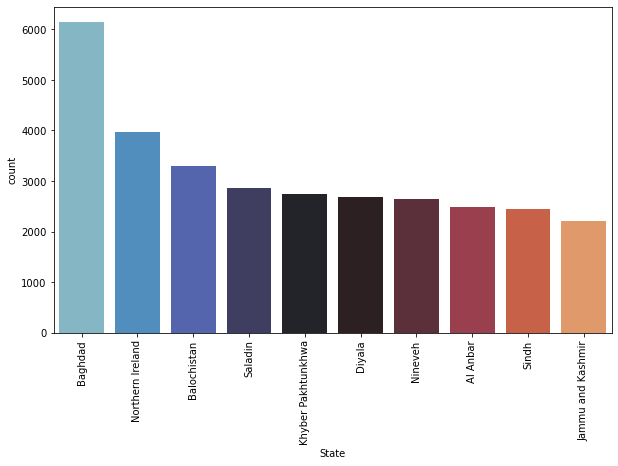

In [37]:
#graphical representation
plt.figure(figsize=(10,6))
sns.countplot(terror['State'],order=terror['State'].value_counts()[:10].index,palette='icefire')
plt.xticks(rotation=90)
plt.show()

In [38]:
#Top 10 cities faces most attacks
terror['City'].value_counts()[:10]

Baghdad         6088
Unknown         5580
Karachi         1961
Belfast         1832
Mosul           1810
Lima            1495
Mogadishu       1439
Santiago        1189
San Salvador    1064
Beirut           837
Name: City, dtype: int64

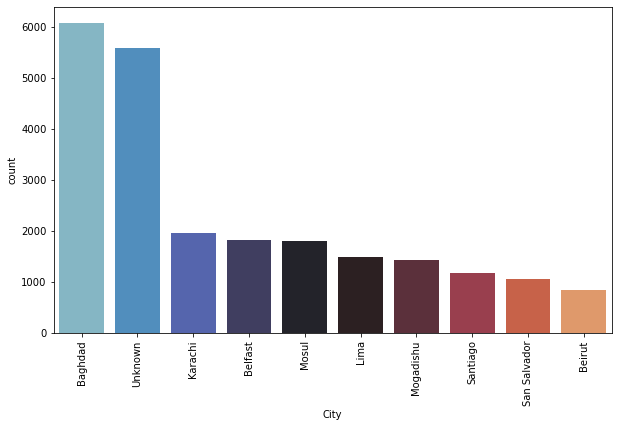

In [39]:
#graphical representation
plt.figure(figsize=(10,6))
sns.countplot(terror['City'],order=terror['City'].value_counts()[:10].index,palette='icefire')
plt.xticks(rotation=90)
plt.show()

# Conclusion:

## After performing the Exploratory Data Analysis we get the following insights from the data:

1) After analysis it is observed that between the time period 1971 to 2017,year 2014 had faced most number of terror attacks
That was around 14742 attacks all over during this year.After 2014 also the number of terrorist attacks increases year after year.

2) It is observed that Iraq,Pakistan,Afghanistan and India are the top 4 countries that faces most of the terrorist attacks.

3) Private Citizens and property were attacked most followed by Military,Police,Government and so on.

4) Middle East and North Africa was most affected among the top affected region.

5) The State and City that was most affected was Baghdad.

6) The most common attack type was Bombing/Explosion

7) Explosives have been consistently the most popular weapon of choice for terrorists

## Suggestions

1) As it is observed through the study that Private Citizens and property are being targeted consistently so security and proper survelliance arrangements should have to be provided.Especially in the dense populated regions.

2) Strict border policy should be adopted to prevent the movement of explosives between the reagons.